# 图片加载

`matplotlib.image`模块提供了读取图片和进行简单处理的能力,他的底层是pillow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
img=mpimg.imread('./source/cat.jpg')

通过`imread()`方法读取的图片会被转换成像素矩阵(numpy的narray对象),其shape与图像分辨率有关,比如:

上图是342x220的图片,那么

In [3]:
img.shape

(220, 342, 3)

其中的3为每个像素表现为一个RGB的三位数组

In [16]:
img

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

我们可以通过plt.imshow(img)将这个数组初始化为一个plot对象

In [4]:
imgplot = plt.imshow(img)

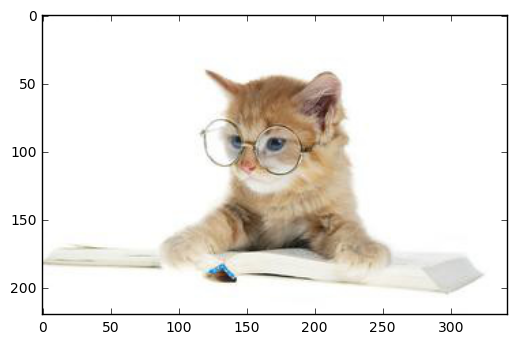

In [5]:
plt.show()

当然了只要是相同格式的数组都可以通过这个方式初始化为一个plot对象

## 将假彩色方案应用于图像绘图

伪彩色可以是一个有用的工具，用于增强对比度和更容易地可视化数据。这在使用投影仪对数据进行演示时尤其有用(它们的对比度通常很差)。假彩色仅与单通道，灰度，光度图像相关。我们目前有一个RGB图像。由于R，G和B都是相似的（见上面或在你的数据中的自己），我们可以只选择一个通道的数据：

In [11]:
lum_img_r = img[:,:,0]

In [12]:
lum_img_r

array([[254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
lum_img_r.shape

(220, 342)

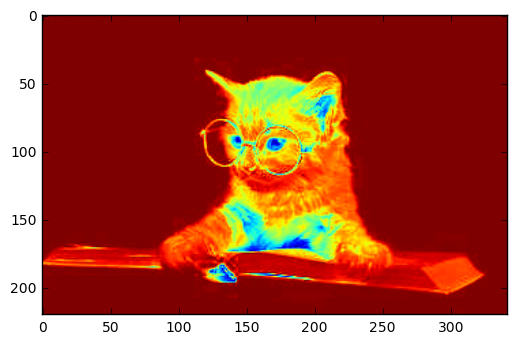

In [14]:
plt.imshow(lum_img_r)
plt.show()

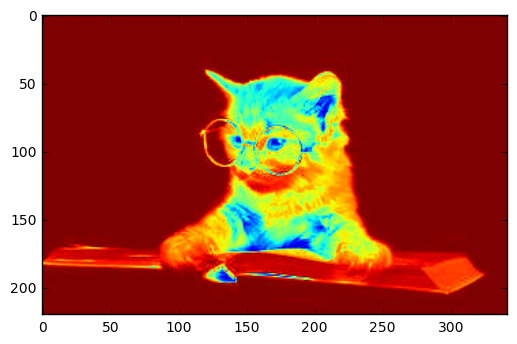

In [16]:
lum_img_g = img[:,:,1]
plt.imshow(lum_img_g)
plt.show()

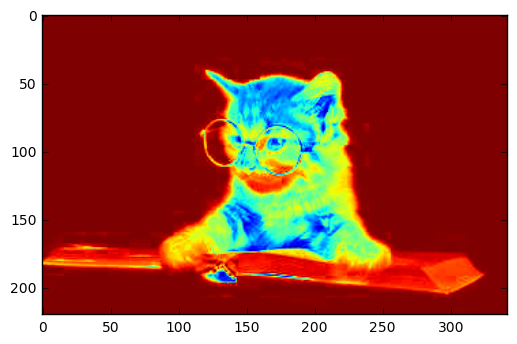

In [20]:
lum_img_g = img[:,:,2]
plt.imshow(lum_img_g)
plt.show()

现在我们以使用R为通道的图片,使用亮度（2D，无颜色）图像，应用默认色彩映射（也称为查找表，LUT）。默认值称为jet。有很多其他的也可以选择。

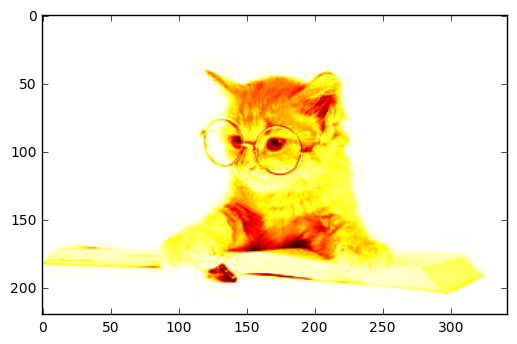

In [22]:
plt.imshow(lum_img_r, cmap="hot")
plt.show()

也还可以使用set_cmap()方法更改现有绘图对象上的颜色

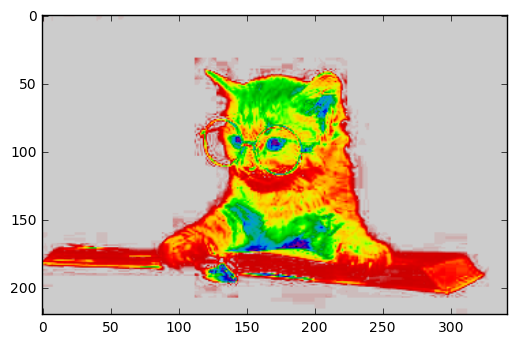

In [23]:
imgplot = plt.imshow(lum_img_r)
imgplot.set_cmap('spectral')
plt.show()

### 色标参考

它有助于了解颜色代表什么值。我们可以通过添加颜色条来做到这一点。

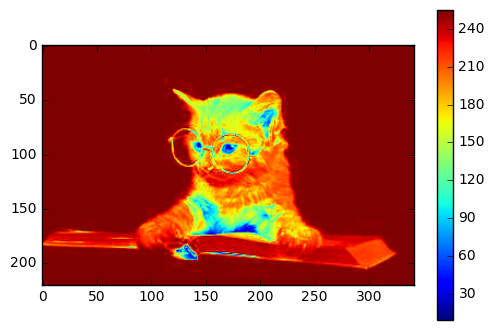

In [24]:
imgplot = plt.imshow(lum_img_r)
plt.colorbar()
plt.show()

### 检查特定数据范围

有时，您想要增强图像的对比度，或者在特定区域中扩大对比度，同时牺牲不会变化很大的颜色的细节，或者无关紧要。找到感兴趣区域的好工具是直方图。要创建我们的图像数据的直方图，我们使用hist（）函数。

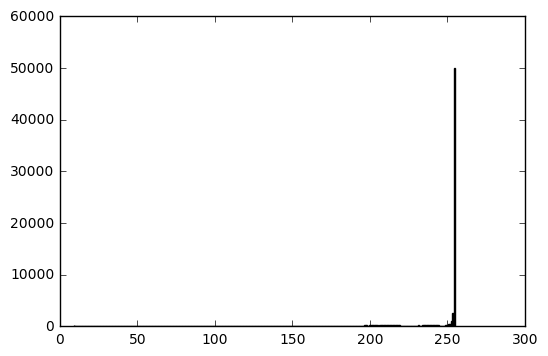

In [47]:
plt.hist(lum_img_r.ravel(), bins=256,fc='k', ec='k')
plt.show()

下图就显示出了各个色值的分布状态,看打出来25x为值的是大多数中的大多数

通常，图像的“有趣”部分在峰值附近，您可以通过剪切峰值上方和/或下方的区域获得额外的对比度。在我们的直方图中，看起来在高端没有太多有用的信息（图像中不是很多白色的东西）。让我们调整上限，以便我们有效地“放大”直方图的一部分。我们通过将clim参数传递给imshow来实现。你也可以通过调用图像绘图对象的set_clim（）方法来做到这一点，但是要确保你在使用IPython Notebook时在plot命令的同一个单元格中这样做 - 它不会改变以前单元格的绘图。

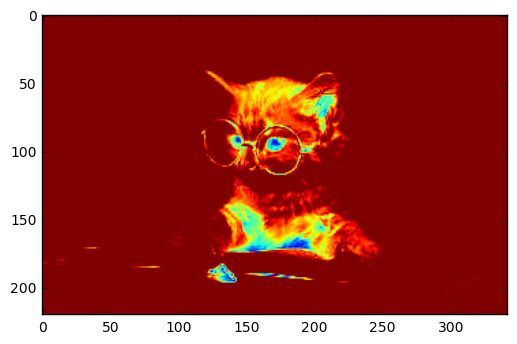

In [57]:
imgplot = plt.imshow(lum_img_r, clim=(0, 200))
plt.show()

## 阵列插值方案

插值根据不同的数学方案计算像素的“应该”的颜色或值。这种情况发生的一个常见的地方是当你调整图像的大小。像素的数量变化，但你想要相同的信息。由于像素是离散的，因此缺少空间。插值是如何填补这个空间。这就是为什么你的图像有时拉伸会出来看起来像素化。当原始图像和扩展图像之间的差异较大时，效果更加明显。比如windows显示像素如果过分低于你的屏幕像素,那么你拉伸到屏幕那么大,看起来就都是马赛克,就是这个效果.

而插值算法就是拉伸时如何模拟的去显示出缺失信息的技术



In [62]:
from PIL import Image
img = Image.open('./source/cat.jpg')

img.thumbnail((64, 64), Image.ANTIALIAS) # 将图片压缩到64x64像素

In [66]:
img.height,img.width#41是因为图片比例

(41, 64)

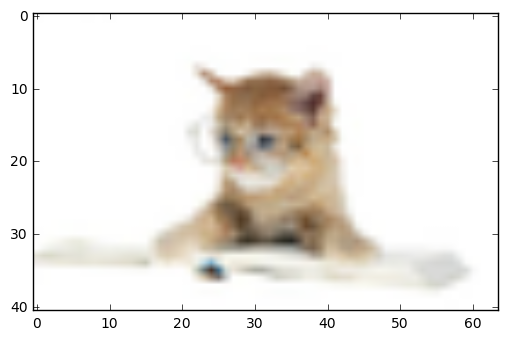

In [61]:
imgplot = plt.imshow(img)
plt.show()

内置的插值算法有

+ 'nearest', 最近值,也就是马赛克块
+ 'bilinear', [双线性插值](https://en.wikipedia.org/wiki/Bilinear_interpolation)
+ 'bicubic',[双三次插值](https://en.wikipedia.org/wiki/Bicubic_interpolation)
+ 'spline16'/'spline36', [样条插值](https://en.wikipedia.org/wiki/Spline_interpolation)
+ 'hanning'/'hamming'/'gaussian'/'kaiser'/'bessel'/'sinc'
    [窗插值算法](https://en.wikipedia.org/wiki/Window_function)
+ 'hermite',[埃尔米特插值](https://en.wikipedia.org/wiki/Hermite_interpolation)
+ 'quadric',[二次曲面插值](https://en.wikipedia.org/wiki/Quadric)
+ 'catrom',[Catmull-Rom插值算法]https://en.wikipedia.org/wiki/Centripetal_Catmull%E2%80%93Rom_spline

+ 'mitchell'

+ 'lanczos'[Lanczos算法](http://baike.baidu.com/link?url=GIZkv1i2pTaJNhQEKqNS3ScaPuVFVJNsZ3lm8_-jMzEVqRqO0EQqN4IQlMcM6r5XxpES-D226PHQs4s7yJNK6uf7R_IHqXJAyVVu4sekM9_tzFEhBmXNvfJ9nXfB-sQb)
    

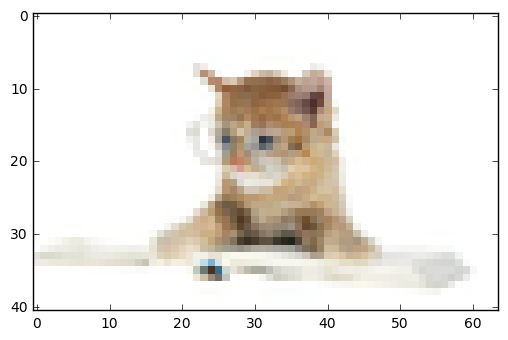

In [67]:
imgplot = plt.imshow(img, interpolation="nearest")
plt.show()

使用双三次插值(bicubic)模糊处理

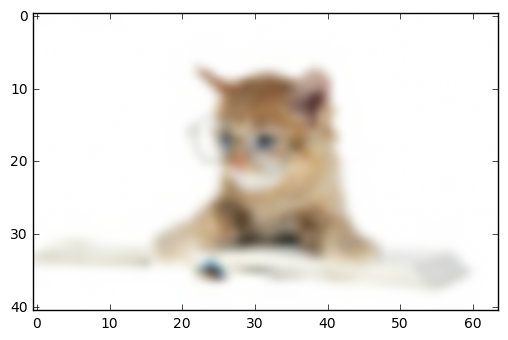

In [68]:
imgplot = plt.imshow(img, interpolation="bicubic")
plt.show()

### 图片修改分辨率

img模块还提供了一个缩略图的工具
`matplotlib.image.thumbnail(infile, thumbfile, scale=0.1, interpolation='bilinear', preview=False)`
它可以直接修改文件并保存为另一文件,只是类型限制在png,svg和pdf三种

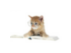

In [77]:
mpimg.thumbnail("./source/cat.jpg", "./source/cat_min.png", scale=0.15, interpolation='bicubic')